# Slide05 NumPy

* http://www.cs.utsa.edu/~jruan/teaching/cs5163f17/
* [Datacamp Numpy Tutorial](https://www.datacamp.com/community/tutorials/python-numpy-tutorial)
* [O'REILLY Python for Data Analysis by Wes McKinney](https://www.oreilly.com/library/view/python-for-data/9781449323592/ch04.html)
* [NumPy Tutorial](https://blog.finxter.com/numpy-tutorial/)



# Outlines
- Numpy array creation
- access and operations
- Basic linear algebra

# Numpy
- It is for Numerical Python
- Is the fundamental package required for high performance computing and data analysis
- It provides
  - ndarray (N-Deminsional Array) for creating multiple dimensional arrays
  - Standard math functions for fast operations on entire arrays of data without having to write loops
  - Tools for reading / writing array data
  - Linear algebra tools 

# ndarray vs list of lists vs list of list of lists .... 

- Say you have grades of three exams (2 midterms and 1 final) in a class of 10 students.


In [10]:
# using a list of lists
examGrades=[[79, 95, 60],
            [95, 60, 61],
            [99, 67, 84],
            [76, 76, 97],
            [91, 84, 98],
            [70, 69, 96],
            [88, 65, 76],
            [67, 73, 80],
            [82, 89, 61],
            [94, 67, 88]]


In [ ]:
# How to get final exam grade of student 0?  
examGrades[0][2]
# How to get grades of student 2? 
examGrades[2]
# How to get grades of all students in midterm 1?
list(map(lambda x:x[0], examGrades))
L=[]
for x in examGrades:
    L.append(x[0])
#How to get midterm grades of the first three students (or all female students, or those who failed final)?
list(map(lambda x:x[0], examGrades))[0:3]
#How to get mean grade of each exam?

#How to get (weighted) average exam grade for each student?
for x in examGrades:
    L.append(x[0]*0.2+x[1]*0.2+x[2]*0.6)


In [ ]:
# How to get final exam grade of student 0?  
print(examGrades[0][2])
# #ow to get grades of student 2? 
print(examGrades[2])

In [ ]:
# How to get grades of all students in midterm 1?
print(list(map(lambda x:x[0], examGrades)))
#How to get midterm grades of the first three students (or all female students, or those who failed final)?
print(list(map(lambda x:x[0], examGrades))[0:3])

In [ ]:
#How to get mean grade of each exam?
L1=list(map(lambda x:x[0], examGrades))
L2=list(map(lambda x:x[1], examGrades))
L3=list(map(lambda x:x[2], examGrades))
print(sum(L1)/len(L1))
print(sum(L2)/len(L2))
print(sum(L3)/len(L3))


In [ ]:
#How to get (weighted) average exam grade for each student?
W=[0.2,0.2,0.6]
for X in examGrades:
    WL=list(map(lambda x, w:x*w, X,W))
    print(sum(WL))

In [11]:
import numpy as np
gArray = np.array(examGrades)
print(gArray)

[[79 95 60]
 [95 60 61]
 [99 67 84]
 [76 76 97]
 [91 84 98]
 [70 69 96]
 [88 65 76]
 [67 73 80]
 [82 89 61]
 [94 67 88]]


In [ ]:
gArray[0,2]

In [ ]:
gArray[2,:]

In [ ]:
gArray[:, 0]  

In [ ]:
gArray[:3, 1:2]

- **Please add print() for each** <font color="blue">In codes</font> 

# ndarray vs list of lists
- ndarray is used for storage of homogeneous data
  - i.e., all elements must be the same type
- Every array must have a shape
- And a dtype
-  convenient slicing, indexing and efficient vectorized computation
   - Avoid for loops, and much more efficient



In [ ]:
type(gArray)

In [ ]:
gArray.ndim

In [ ]:
gArray.shape

In [ ]:
gArray.dtype

# Creating ndarrays

- np.array

In [ ]:
np.array([[0,1,2],[2,3,4]])

- np.zeros

In [ ]:
np.zeros((2,3))

- np.ones

In [ ]:
np.ones((2,3))

- np.eye

In [ ]:
np.eye(3)

- np.arrange

In [ ]:
np.arange(0, 10, 2)

- np.random

In [ ]:
np.random.randint(0, 10, (3,3))

# Numpy data types
- int8, int16, int32, int64
- float16, float32, float64, float128
- bool
- object
- String
- Unicode

- gArray.astype


- float

In [ ]:
gArray.astype(dtype='float64')

- String

In [ ]:
num_string = np.array(['1.0', '2.05', '3'])
num_string

In [ ]:
num_string.astype(float)

# Array operations
* Between arrays and scalars
* Between equal-sized arrays: elementwise operation

In [ ]:
arr = np.array([[0,1,2],[3,4,5]])

In [ ]:
arr * 2

In [ ]:
arr ** 2

In [ ]:
2 ** arr

In [ ]:
arr * arr

# Speed difference between "For Loop" and "Vectorized" computation

In [ ]:
import timeit
timeit.timeit('\
import numpy as np;\
a = np.random.rand(1000000,1);\
a**2'\
, number=10)

In [ ]:
timeit.timeit('\
import numpy as np;\
a = np.random.rand(1000000,1);\
[a[i]**2 for i in range(1000000)]'\
, number=10)

* <font color="red">Vectorization is more than 300 times faster!</font> 

In [ ]:
import timeit
timeit.timeit('\
import numpy as np;\
a = np.random.rand(1000000,1);\
list(map(lambda x: x**2, a))'\
, number=100)

* <font color="red">map appears to be very fast, but it is just because it is lazy – actual calculation has not been done yet.</font>  

# Laziness
* [Python Memory Efficiency Programming](https://medium.com/learning-better-ways-of-interpretting-and-using/python-generators-memory-efficient-programming-tool-41f09077353c)
* In terms of efficiency, like most functional programming constructs, MAP CAN BE LAZY, and in fact is lazy in python. That means you can do this (in python3) and your computer will not run out of memory and lose all your unsaved data:

In [ ]:
map(str, range(10**100))

In [ ]:
[str(n) for n in range(10**100)]
# don't run it

Do note that list comprehensions are also inherently lazy, but python has chosen to implement them as non-lazy. Nevertheless, python does support lazy list comprehensions in the form of generator expressions, as follows:

In [ ]:
(str(n) for n in range(10**100))

In [ ]:
gen=(str(n) for n in range(10**100))
print(type(gen))

# Speed difference between for loop and vectorized computation

In [ ]:
def mySum():
    import numpy as np
    a = np.random.rand(1000000,1)
    s = 0
    for i in range(len(a)):
        s += a[i]
    return s 

In [ ]:
import timeit
timeit.timeit(mySum, setup="from __main__ import mySum", number=100)

In [ ]:
def mySum2():
    import numpy as np
    a = np.random.rand(1000000,1)
    return np.sum(a)

In [ ]:
import timeit
timeit.timeit(mySum2, setup="from __main__ import mySum2", number=100)

* <font color="red">Vectorization is 100 times faster than for loop.</font>

# Array indexing and slicing
- Somewhat similar to python list, but much more flexible

In [ ]:
gArray

In [ ]:
gArray[0]

In [ ]:
gArray[1:3]

In [ ]:
gArray[0][2]

In [ ]:
gArray[0,2]

In [ ]:
gArray[:, 2]

# Array indexing and slicing (cont’d)

In [ ]:
print(gArray)
gArray[:2, [0, 2]]

In [ ]:
gArray[[0, 2], :]

In [ ]:
gArray[[0, 2, 1], [0, 1, 2]]

In [ ]:
gArray[[0, 2], [0, 2]]


# Array indexing and slicing (cont’d)

In [ ]:
gArray

In [ ]:
gArray[[0,2]][:,[0,2]]
# try to print(gArray[[0,2]])

In [ ]:
gArray[np.ix_([0, 2], [0, 2])]
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.ix_.html

# Array slices are views

In [ ]:
gArray[0,:]=100
gArray

In [ ]:
arr2 = gArray.copy()

In [ ]:
arr2 is gArray

In [ ]:
arr2[1,:]=100

In [ ]:
gArray[1,:]

- Use .copy() to make a copy of an array explicitly.

# Boolean indexing

In [ ]:
# select record for female students
female = [ True, False,  True,  True, False,  True, False, False, False, False]

In [ ]:
gArray[female, :]

In [ ]:
# select record for those who had # <= 70 in final
gArray[gArray[:, 2]<70,:]

In [ ]:
# anything < 70 is changed to 70
gArray[gArray < 70] = 70

In [ ]:
gArray

# Reshaping and transposing

<div>
<img src="https://raw.githubusercontent.com/LiqingZhang-um/Markdown-Photos-/master/Picture5.png" width="20%"/>
</div>


In [2]:
import numpy as np
np.arange(6).reshape((2,3))

array([[0, 1, 2],
       [3, 4, 5]])

In [3]:
np.arange(6).reshape((2,3), order='F')

array([[0, 2, 4],
       [1, 3, 5]])

In [4]:
np.arange(6).reshape(2,3).T

array([[0, 3],
       [1, 4],
       [2, 5]])

# Fast element-wise functions
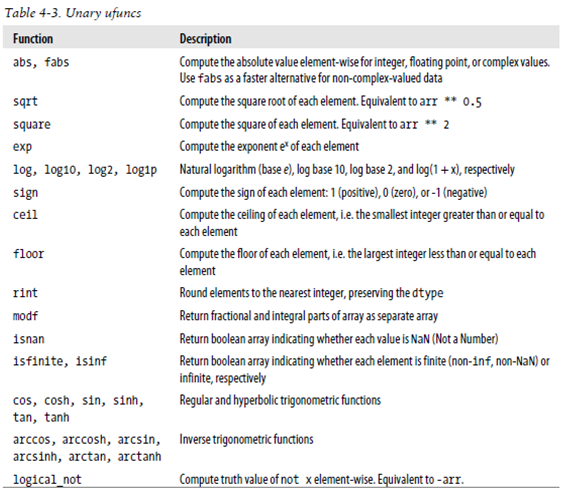

# Binary universal functions
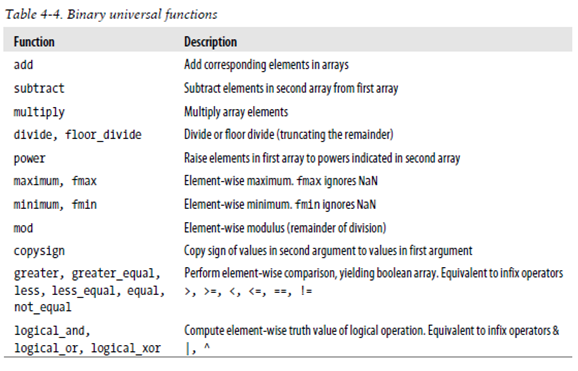

# Computation on Arrays: Broadcasting
https://jakevdp.github.io/PythonDataScienceHandbook/02.05-computation-on-arrays-broadcasting.html

We saw in the previous section how NumPy's universal functions can be used to vectorize operations and thereby remove slow Python loops. Another means of vectorizing operations is to use NumPy's broadcasting functionality. Broadcasting is simply a set of rules for applying binary ufuncs (e.g., addition, subtraction, multiplication, etc.) on arrays of different sizes.

# Introducing Broadcasting
Recall that for arrays of the same size, binary operations are performed on an element-by-element basis:

In [53]:
import numpy as np
a = np.array([0, 1, 2])
b = np.array([5, 5, 5])
a + b

array([5, 6, 7])

The term broadcasting refers to the ability of NumPy to treat arrays of different shapes during arithmetic operations. Arithmetic operations on arrays are usually done on corresponding elements. If two arrays are of exactly the same shape, then these operations are smoothly performed.

Broadcasting allows these types of binary operations to be performed on arrays of different sizes–for example, we can just as easily add a scalar (think of it as a zero-dimensional array) to an array:

In [54]:
a + 5

array([5, 6, 7])

We can think of this as an operation that stretches or duplicates the value 5 into the array [5, 5, 5], and adds the results. The advantage of NumPy's broadcasting is that this duplication of values does not actually take place, but it is a useful mental model as we think about broadcasting.

We can similarly extend this to arrays of higher dimension. Observe the result when we add a one-dimensional array to a two-dimensional array:

In [56]:
M = np.ones((3, 3))
M

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [57]:
M + a

array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

Here the one-dimensional array a is stretched, or broadcast across the second dimension in order to match the shape of M.

While these examples are relatively easy to understand, more complicated cases can involve broadcasting of both arrays. Consider the following example:

In [58]:
a = np.arange(3)
b = np.arange(3)[:, np.newaxis]

print(a)

print(b)

[0 1 2]
[[0]
 [1]
 [2]]


In [59]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

Just as before we stretched or broadcasted one value to match the shape of the other, here we've stretched both a and b to match a common shape, and the result is a two-dimensional array! The geometry of these examples is visualized in the following figure (Code to produce this plot can be found in the appendix, and is adapted from source published in the astroML documentation. Used by permission).

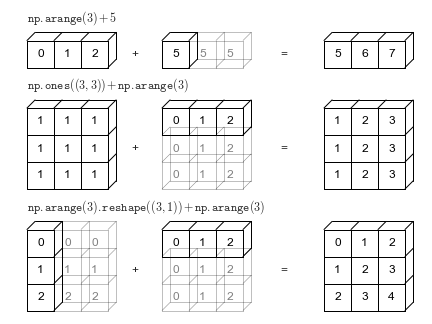

The light boxes represent the broadcasted values: again, this extra memory is not actually allocated in the course of the operation, but it can be useful conceptually to imagine that it is.

# Rules of Broadcasting

Broadcasting in NumPy follows a strict set of rules to determine the interaction between the two arrays:

- Rule 1: If the two arrays differ in their number of dimensions, the shape of the one with fewer dimensions is padded with ones on its leading (left) side.
- Rule 2: If the shape of the two arrays does not match in any dimension, the array with shape equal to 1 in that dimension is stretched to match the other shape.
- Rule 3: If in any dimension the sizes disagree and neither is equal to 1, an error is raised.

To make these rules clear, let's consider a few examples in detail.

## Broadcasting example 1

Let's look at adding a two-dimensional array to a one-dimensional array:

In [ ]:
M = np.ones((2, 3))
a = np.arange(3)

Let's consider an operation on these two arrays. The shape of the arrays are
- M.shape = (2, 3)
- a.shape = (3,)

We see by rule 1 that the array a has fewer dimensions, so we pad it on the left with ones:
- M.shape -> (2, 3)
- a.shape -> (1, 3)

By rule 2, we now see that the first dimension disagrees, so we stretch this dimension to match:
- M.shape -> (2, 3)
- a.shape -> (2, 3)

The shapes match, and we see that the final shape will be (2, 3):

In [ ]:
M + a

## Broadcasting example 2

Let's take a look at an example where both arrays need to be broadcast:

In [ ]:
a = np.arange(3).reshape((3, 1))
b = np.arange(3)

Rule 1 says we must pad the shape of b with ones:
- a.shape -> (3, 1)
- b.shape -> (1, 3)

And rule 2 tells us that we upgrade each of these ones to match the corresponding size of the other array:
- a.shape -> (3, 3)
- b.shape -> (3, 3)

In [ ]:
a + b

## Broadcasting example 3

Now let's take a look at an example in which the two arrays are not compatible:

In [65]:
M = np.ones((3, 2))
a = np.arange(3)
M+a

ValueError: operands could not be broadcast together with shapes (3,2) (3,) 

Again, rule 1 tells us that we must pad the shape of a with ones:
- M.shape -> (3, 2)
- a.shape -> (1, 3)

By rule 2, the first dimension of a is stretched to match that of M:
- M.shape -> (3, 2)
- a.shape -> (3, 3)

Now we hit rule 3–the final shapes do not match, so these two arrays are incompatible, as we can observe by attempting this operation:

In [ ]:
M + a

Note the potential confusion here: you could imagine making a and M compatible by, say, padding a's shape with ones on the **right** rather than the **left**. 

But this is not how the broadcasting rules work! That sort of flexibility might be useful in some cases, but it would lead to potential areas of ambiguity. If right-side padding is what you'd like, you can do this explicitly by reshaping the array (we'll use the np.newaxis keyword introduced in The Basics of NumPy Arrays):

In [63]:
a[:, np.newaxis].shape
print(a[:, np.newaxis])
print(M)

[[0]
 [1]
 [2]]
[[1. 1.]
 [1. 1.]
 [1. 1.]]


In [64]:
M + a[:, np.newaxis]

array([[1., 1.],
       [2., 2.],
       [3., 3.]])

## Plotting a two-dimensional function

One place that broadcasting is very useful is in displaying images based on two-dimensional functions. If we want to define a function z=f(x,y), broadcasting can be used to compute the function across the grid:

In [68]:
# x and y have 50 steps from 0 to 5
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 50)[:, np.newaxis]

z = np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

We'll use Matplotlib to plot this two-dimensional array (these tools will be discussed in full in Density and Contour Plots):

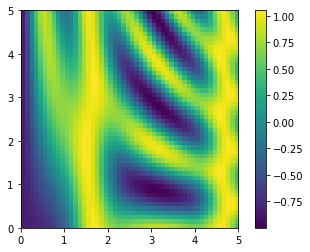

In [69]:
import matplotlib.pyplot as plt
plt.imshow(z, origin='lower', extent=[0, 5, 0, 5],
           cmap='viridis')
plt.colorbar();

# Matrix
- A matrix is a rectangular array of numbers organized in rows and columns
- If a matrix A has m rows and n columns, then we say that A is an m x n matrix
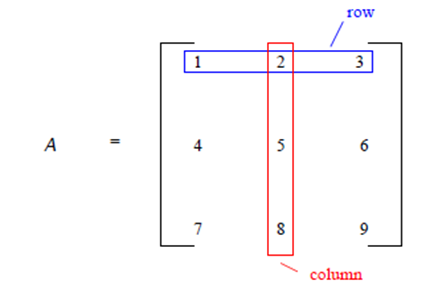

# Matrix
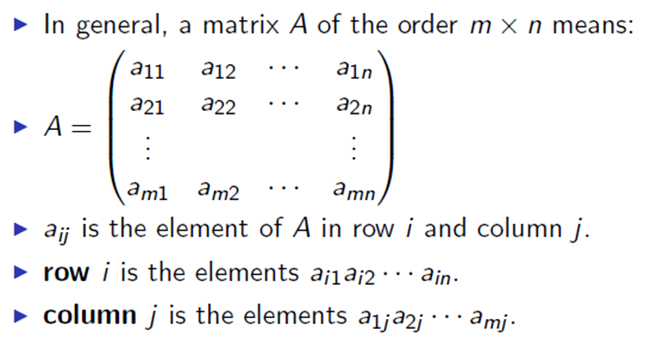

# Vectors
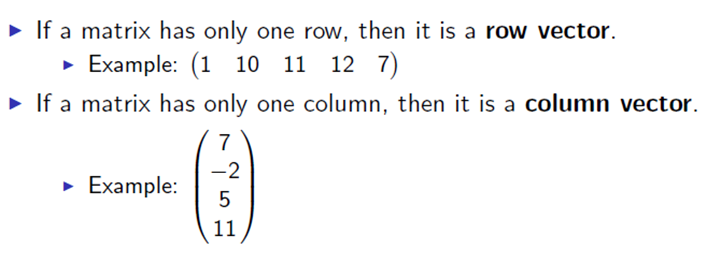


# Identity matrix
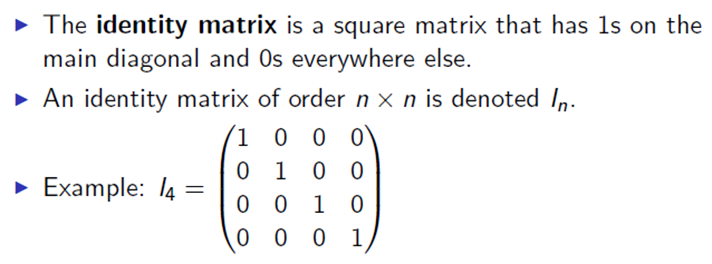

# Diagonal matrix
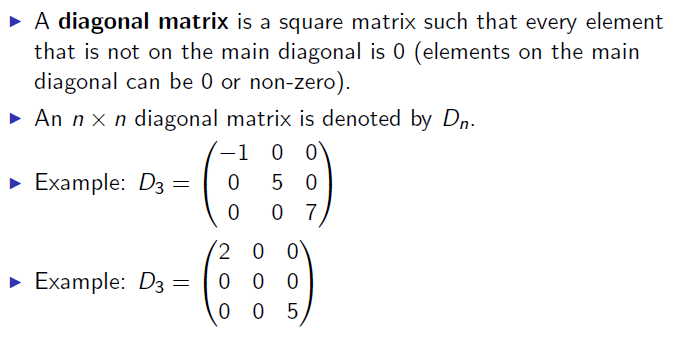

# Dot product
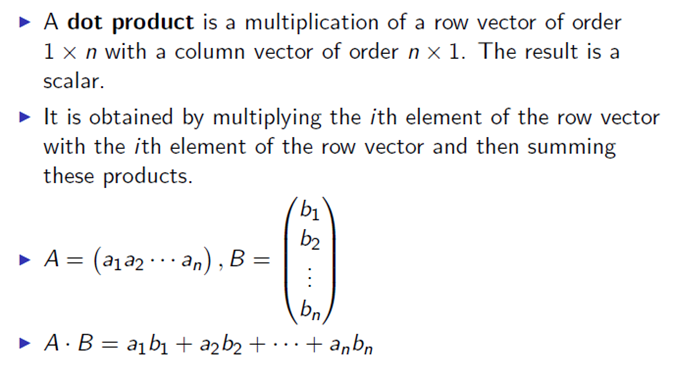

In [5]:
a = b = np.arange(5)

In [6]:
a

array([0, 1, 2, 3, 4])

In [7]:
b

array([0, 1, 2, 3, 4])

In [8]:
a.dot(b)

30

# Matrix multiplication
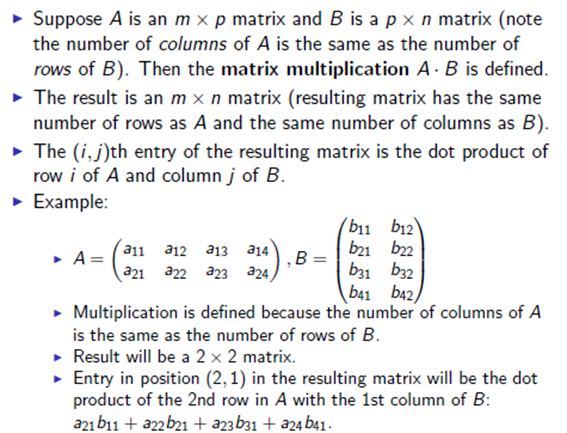

# Matrix multiplication

In [ ]:
gArray


 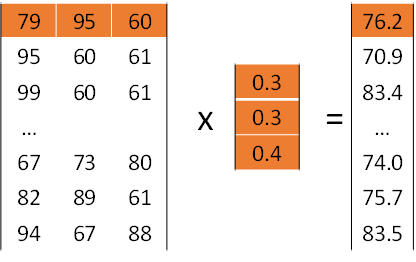

In [ ]:
gArray.dot([0.3, 0.3, 0.4])

# Matrix multiplication (cont’)

In [12]:
gArray

array([[79, 95, 60],
       [95, 60, 61],
       [99, 67, 84],
       [76, 76, 97],
       [91, 84, 98],
       [70, 69, 96],
       [88, 65, 76],
       [67, 73, 80],
       [82, 89, 61],
       [94, 67, 88]])

In [13]:
scaling = [1.1, 1.05, 1.03]
np.diag(scaling)

array([[1.1 , 0.  , 0.  ],
       [0.  , 1.05, 0.  ],
       [0.  , 0.  , 1.03]])

In [ ]:
gArray.dot(np.diag(scaling))

- What are we doing here?

# Matrix multiplication (cont’)

In [15]:
gArray

array([[79, 95, 60],
       [95, 60, 61],
       [99, 67, 84],
       [76, 76, 97],
       [91, 84, 98],
       [70, 69, 96],
       [88, 65, 76],
       [67, 73, 80],
       [82, 89, 61],
       [94, 67, 88]])

In [17]:
gArray.max(axis=1)

array([95, 95, 99, 97, 98, 96, 88, 80, 89, 94])

In [18]:
maxInExam = gArray.max(axis=0)
gArray.dot(np.diag(100/maxInExam)).round()

array([[ 80., 100.,  61.],
       [ 96.,  63.,  62.],
       [100.,  71.,  86.],
       [ 77.,  80.,  99.],
       [ 92.,  88., 100.],
       [ 71.,  73.,  98.],
       [ 89.,  68.,  78.],
       [ 68.,  77.,  82.],
       [ 83.,  94.,  62.],
       [ 95.,  71.,  90.]])

- What are we doing here?

# Speed difference between for loop and matrix multiplication

In [19]:
a = np.random.rand(10000, 100)

In [ ]:
timeit a.dot(100/a.max(0))

In [ ]:
timeit [a[:,i]*100/max(a[:,i]) for i in range(100)]

In [ ]:
timeit [[a[j,i]*100/max(a[:,i]) for i in range(100)
                                for j in range(10000)]]

- Ctrl-C

# Speed difference between for loop and matrix multiplication

In [ ]:
maxInCol = a.max(axis=0)

In [ ]:
maxInCol.shape

In [ ]:
timeit [a[:i]*100/max(a[:,i]) for i in range(100)]

In [ ]:
timeit [[a[j,i]*100/maxInCol[i] for i in range(100)] for j in range(10000)]

# Basic statistics

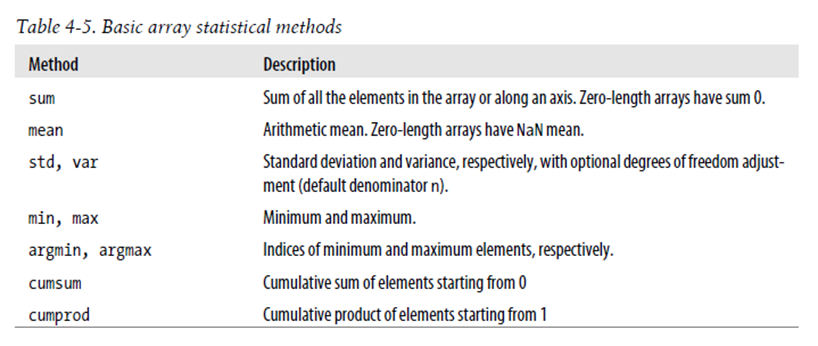

# Basic statistics

In [31]:
a=np.random.randint(0, 5, size=(3,3))

In [32]:
a

array([[0, 0, 3],
       [2, 1, 3],
       [4, 3, 3]])

In [24]:
a.sum()

19

In [25]:
a.sum(axis=0)

array([7, 6, 6])

In [27]:
a.sum(1)
print(a>2)

[[False  True  True]
 [ True False False]
 [False False False]]


In [28]:
(a > 2).any(1)

array([ True,  True, False])

# numpy.sort()

In [33]:
a.sort()

In [34]:
a

array([[0, 0, 3],
       [1, 2, 3],
       [3, 3, 4]])

In [37]:
a[0,1]=10
print(a)
a.sort(0)

[[ 0 10  3]
 [ 1  2  3]
 [ 3  3  4]]


In [38]:
a

array([[ 0,  2,  3],
       [ 1,  3,  3],
       [ 3, 10,  4]])

# Adjacency matrix for a graph

In [40]:
import numpy as np
friends=np.array([[0, 2],
       [0, 6],
       [1, 3],
       [4, 7],
       [5, 8],
       [6, 7]], dtype='int64')


([<matplotlib.axis.XTick at 0x11d1154a8>,
 <a list of 9 Text xticklabel objects>)

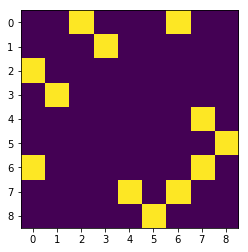

In [41]:
import matplotlib.pyplot as plt

n=friends.max()
frdGraph = np.zeros((n+1,n+1))
frdGraph[friends[:,0],friends[:,1]]=1
frdGraph[friends[:,1],friends[:,0]]=1
plt.imshow(frdGraph)
plt.xticks(range(9))


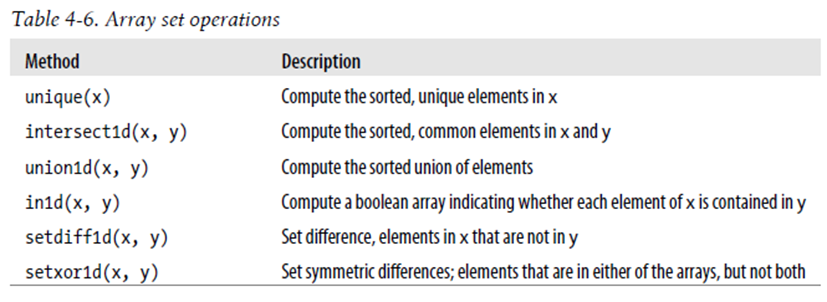

In [47]:
import numpy as np
edgeList=np.array([['Amy', 'Frank'],
                   ['Amy', 'Katy'],
                   ['Emma', 'James'],
                   ['Cindy', 'Rose'],
                   ['Tim', 'John'],
                   ['Katy', 'Rose']], dtype='<U5')

In [48]:
names, indices = np.unique(edgeList, return_inverse=True)

In [49]:
names

array(['Amy', 'Cindy', 'Emma', 'Frank', 'James', 'John', 'Katy', 'Rose',
       'Tim'], dtype='<U5')

In [50]:
indices

array([0, 3, 0, 6, 2, 4, 1, 7, 8, 5, 6, 7])

In [ ]:
np.reshape(indices,(-1, 2)).T

In [43]:
edgeList=np.array([['Amy', 'Frank'],
['Amy', 'Katy'],
['Emma', 'James'],
['Cindy', 'Rose'],
['Tim', 'John'],
['Katy', 'Rose']], 
dtype='<U5')

In [52]:
names, indices = np.unique(edgeList, return_inverse=True)
names

array(['Amy', 'Cindy', 'Emma', 'Frank', 'James', 'John', 'Katy', 'Rose',
       'Tim'], dtype='<U5')

In [51]:
indices

array([0, 3, 0, 6, 2, 4, 1, 7, 8, 5, 6, 7])

([<matplotlib.axis.XTick at 0x11d1df048>,
 <a list of 9 Text xticklabel objects>)

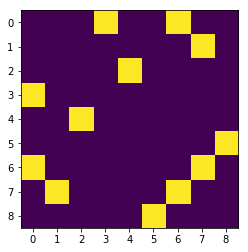

In [46]:
import matplotlib.pyplot as plt

n = indices.max()
frdGraph2 = np.zeros((n+1,n+1))
frdGraph2[indices[::2], indices[1::2]] = 1
frdGraph2[indices[1::2], indices[::2]] = 1
plt.imshow(frdGraph2); plt.xticks(range(n+1))

# Sparse matrix support
* In scipy.sparse
* Necessary for larger sparse graphs (e.g. social networks)
* Most real world networks are sparse
* Memory efficiency is crucial for applications

* https://docs.scipy.org/doc/scipy/reference/index.html

# Sorting

In [70]:
# Timing code
import time
import numpy as np


def timeit(fun, xs):
    t = time.time()
    for i in range(len(xs)):  # inline and map gave much worse results for x[-I], 5*t
        fun(xs[i])
    t = time.time() - t
    print(np.round(t,6))

A = np.random.randn(3,4,5)
print(np.all(np.flip(A,2) == A[:,:,::-1,...]))

I, N = 1, (5, 5)
xs = np.random.rand(I,*N)
timeit(lambda x: np.sort(x)[:,::-1], xs)
timeit(lambda x: -np.sort(-x), xs)
timeit(lambda x: np.flip(x.sort()), xs)
timeit(lambda x: x[-x.argsort()], xs)
timeit(lambda x: x.sort(), xs)
timeit(lambda x: x.argsort(), xs)
timeit(lambda x: np.flip(x), xs)

True
0.0
0.0
0.0
0.0
0.0
0.0
0.0
